In [1]:
import torch
torch.cuda.set_device(0)
print(torch.cuda.current_device())

0


In [2]:
import requests
from PIL import Image
from io import BytesIO
from torchvision import transforms

# URL of a sample image (ensure the image is appropriate for testing)
url = 'https://example.com/sample_image.jpg'
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Define preprocessing steps (resize, crop, convert to tensor, normalize)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

input_tensor = preprocess(img)
input_batch = input_tensor.unsqueeze(0)  

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7fcfd6188360>

In [3]:
import torch
import torchvision.models as models
from torchsummary import summary

# Load a pretrained VGG16 model
vgg16 = models.vgg16(weights=models.VGG16_Weights.DEFAULT)

# Print model summary
print(summary(vgg16, (3, 224, 224)))


Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 512, 7, 7]           --
|    └─Conv2d: 2-1                       [-1, 64, 224, 224]        1,792
|    └─ReLU: 2-2                         [-1, 64, 224, 224]        --
|    └─Conv2d: 2-3                       [-1, 64, 224, 224]        36,928
|    └─ReLU: 2-4                         [-1, 64, 224, 224]        --
|    └─MaxPool2d: 2-5                    [-1, 64, 112, 112]        --
|    └─Conv2d: 2-6                       [-1, 128, 112, 112]       73,856
|    └─ReLU: 2-7                         [-1, 128, 112, 112]       --
|    └─Conv2d: 2-8                       [-1, 128, 112, 112]       147,584
|    └─ReLU: 2-9                         [-1, 128, 112, 112]       --
|    └─MaxPool2d: 2-10                   [-1, 128, 56, 56]         --
|    └─Conv2d: 2-11                      [-1, 256, 56, 56]         295,168
|    └─ReLU: 2-12                        [-1, 256, 56, 56]      

In [4]:
import torch
from PIL import Image
import torchvision.transforms as transforms
import torchvision.models as models

def process(img):
    # Define preprocessing steps: resize, crop, convert to tensor, and normalize.
    preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])
    input_tensor = preprocess(img)
    input_batch = input_tensor.unsqueeze(0)  # Create a mini-batch as expected by the model.
    return input_batch




In [ ]:
# Load the image using PIL
dog = Image.open('dog.jpg')

# Preprocess the image
dog = process(dog)

# Load the pretrained VGG16 model and set it to evaluation mode
vgg16 = models.vgg16(pretrained=True)
vgg16.eval()

# Forward pass: make sure to disable gradients for inference.
with torch.no_grad():
    output = vgg16(dog)

# Print the index of the class with the highest score
print(output.argmax().item())


style = Image.open('style.jpg')
style = process(style).to(device)
vgg16 = models.vgg16(pretrained=True)
vgg16.eval()

with torch.no_grad():
    output = vgg16(style)   
    
print(output.argmax().item())

/home/project/anaconda3/envs/latentconst/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/project/anaconda3/envs/latentconst/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


207
794


In [6]:
def loss_content(output, target):
    return torch.nn.functional.mse_loss(output, target)

import torch
import torch.nn.functional as F

def gram_matrix(feature_map):
    """
    Compute the Gram matrix from a given feature map.
    
    Args:
        feature_map (torch.Tensor): Tensor of shape (batch_size, channels, height, width).
    
    Returns:
        torch.Tensor: Normalized Gram matrix of shape (batch_size, channels, channels).
    """
    batch_size, channels, height, width = feature_map.size()
    # Reshape feature_map to (batch_size, channels, height*width)
    features = feature_map.view(batch_size, channels, height * width)
    # Compute the Gram matrix using batch matrix multiplication
    gram = torch.bmm(features, features.transpose(1, 2))
    # Normalize the Gram matrix by the number of elements in each feature map
    gram = gram / (channels * height * width)
    return gram

def style_loss(generated, target):
    """
    Computes the style loss between generated image features and target style features.
    
    Args:
        generated (torch.Tensor): Generated image features of shape (batch_size, channels, height, width).
        target (torch.Tensor): Target style image features of shape (batch_size, channels, height, width).
    
    Returns:
        torch.Tensor: Scalar representing the style loss.
    """
    # Compute Gram matrices for both feature maps
    gram_generated = gram_matrix(generated)
    gram_target = gram_matrix(target)
    # Compute the mean squared error between the Gram matrices
    loss = F.mse_loss(gram_generated, gram_target)
    return loss
 




/home/project/anaconda3/envs/latentconst/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/project/anaconda3/envs/latentconst/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/tmp/ipykernel_2170155/2828339652.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.mean = torch.tensor(mean).view(-1, 1, 1).to(device)
/tmp/ipykernel_2170155/282833

Starting the style transfer...
Iteration 50:
Style Loss:  nan Content Loss:  nan

Iteration 100:
Style Loss:  nan Content Loss:  nan

Iteration 150:
Style Loss:  nan Content Loss:  nan

Iteration 200:
Style Loss:  nan Content Loss:  nan

Iteration 250:
Style Loss:  nan Content Loss:  nan

Iteration 300:
Style Loss:  nan Content Loss:  nan



/home/project/anaconda3/envs/latentconst/lib/python3.9/site-packages/torchvision/transforms/functional.py:282: RuntimeWarning: invalid value encountered in cast
  npimg = (npimg * 255).astype(np.uint8)


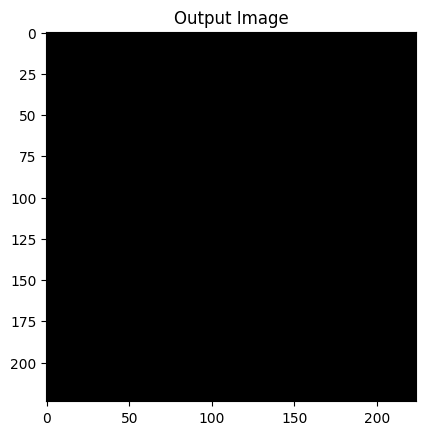

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.models as models
import copy
from PIL import Image
import matplotlib.pyplot as plt


# Set device: use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the image size (smaller if no GPU)
imsize = 512 if torch.cuda.is_available() else 128

# Preprocessing: resize and convert to tensor
loader = transforms.Compose([
    transforms.Resize(imsize),
    transforms.ToTensor()
])

def image_loader(image_path):
    """Load an image and convert it to a normalized torch tensor."""
    image = Image.open(image_path)
    # Add batch dimension and move to device
    image = loader(image).unsqueeze(0)
    return image.to(device, torch.float)

# Load the content and style images (ensure both images are the same size)
content_img =dog.to(device)
style_img = style.to(device)
assert content_img.size() == style_img.size(), "Content and style images must be of the same size."

# Function to convert tensor to PIL image for visualization
unloader = transforms.ToPILImage()
def imshow(tensor, title=None):
    image = tensor.cpu().clone()
    image = image.squeeze(0)      # remove the batch dimension
    image = unloader(image)
    plt.imshow(image)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

# Define a module to compute content loss
class ContentLoss(nn.Module):
    def __init__(self, target):
        super(ContentLoss, self).__init__()
        # 'detach' the target content from the graph
        self.target = target.detach()

    def forward(self, input):
        self.loss = nn.functional.mse_loss(input, self.target)
        return input

# Helper function: compute Gram matrix for style loss
def gram_matrix(input):
    a, b, c, d = input.size()  # a=batch size(=1)
    features = input.view(a * b, c * d)  # reshape into two dimensions
    G = torch.mm(features, features.t())
    return G.div(a * b * c * d)

# Define a module to compute style loss
class StyleLoss(nn.Module):
    def __init__(self, target_feature):
        super(StyleLoss, self).__init__()
        # compute the Gram matrix for target style and detach it
        self.target = gram_matrix(target_feature).detach()

    def forward(self, input):
        G = gram_matrix(input)
        self.loss = nn.functional.mse_loss(G, self.target)
        return input

# Load the pre-trained VGG19 model (we only need the features)
cnn = models.vgg19(pretrained=True).features.to(device).eval()

# Normalization mean and std for VGG networks
cnn_normalization_mean = torch.tensor([0.485, 0.456, 0.406]).to(device)
cnn_normalization_std = torch.tensor([0.229, 0.224, 0.225]).to(device)

# Define a normalization module to use in our model
class Normalization(nn.Module):
    def __init__(self, mean, std):
        super(Normalization, self).__init__()
        # reshape mean and std for easy subtraction and division
        self.mean = torch.tensor(mean).view(-1, 1, 1).to(device)
        self.std = torch.tensor(std).view(-1, 1, 1).to(device)

    def forward(self, img):
        return (img - self.mean) / self.std

# Layers to compute content and style losses from the VGG network
content_layers_default = ['conv_4']
style_layers_default = ['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5']

def get_style_model_and_losses(cnn, normalization_mean, normalization_std,
                               style_img, content_img,
                               content_layers=content_layers_default,
                               style_layers=style_layers_default):
    # Copy the CNN to avoid modifying the original
    cnn = copy.deepcopy(cnn)
    normalization = Normalization(normalization_mean, normalization_std).to(device)

    content_losses = []
    style_losses = []

    # Build a new sequential model with normalization as the first layer
    model = nn.Sequential(normalization)

    i = 0  # Increment for every convolutional layer
    for layer in cnn.children():
        if isinstance(layer, nn.Conv2d):
            i += 1
            name = 'conv_{}'.format(i)
        elif isinstance(layer, nn.ReLU):
            name = 'relu_{}'.format(i)
            # Replace in-place ReLU to avoid modifying computation graph
            layer = nn.ReLU(inplace=False)
        elif isinstance(layer, nn.MaxPool2d):
            name = 'pool_{}'.format(i)
        elif isinstance(layer, nn.BatchNorm2d):
            name = 'bn_{}'.format(i)
        else:
            raise RuntimeError('Unrecognized layer: {}'.format(layer.__class__.__name__))

        model.add_module(name, layer)

        if name in content_layers:
            target = model(content_img).detach()
            content_loss = ContentLoss(target)
            model.add_module("content_loss_{}".format(i), content_loss)
            content_losses.append(content_loss)

        if name in style_layers:
            target_feature = model(style_img).detach()
            style_loss = StyleLoss(target_feature)
            model.add_module("style_loss_{}".format(i), style_loss)
            style_losses.append(style_loss)

    # Trim off layers after the last content or style loss module
    for i in range(len(model) - 1, -1, -1):
        if isinstance(model[i], ContentLoss) or isinstance(model[i], StyleLoss):
            break
    model = model[:(i + 1)]

    return model, style_losses, content_losses

# Get our model with loss layers
model, style_losses, content_losses = get_style_model_and_losses(cnn,
    cnn_normalization_mean, cnn_normalization_std, style_img, content_img)

# Initialize the input image as a clone of the content image
input_img = content_img.clone()

# Choose LBFGS optimizer for the input image
optimizer = optim.LBFGS([input_img.requires_grad_()])

# NST hyperparameters: number of iterations, style weight, and content weight
num_steps = 300
style_weight = 1e6
content_weight = 1

print("Starting the style transfer...")
run = [0]
while run[0] <= num_steps:

    def closure():
        # Clamp the input image to [0, 1]
        input_img.data.clamp_(0, 1)
        optimizer.zero_grad()
        model(input_img)
        style_score = 0
        content_score = 0

        # Sum up the style and content losses
        for sl in style_losses:
            style_score += sl.loss
        for cl in content_losses:
            content_score += cl.loss

        # Total loss is weighted sum of style and content losses
        loss = style_weight * style_score + content_weight * content_score
        loss.backward()

        run[0] += 1
        if run[0] % 50 == 0:
            print("Iteration {}:".format(run[0]))
            print('Style Loss: {:4f} Content Loss: {:4f}'.format(
                style_score.item(), content_score.item()))
            print()
        return loss

    optimizer.step(closure)

# Clamp the final output and display
input_img.data.clamp_(0, 1)
plt.figure()
imshow(input_img, title='Output Image')
plt.ioff()
plt.show()
